#Tercera evaluacion de Física Computacional


Jenifer Alondra Ocaña Miranda

##Bibliotecas a utilizar

In [1]:
import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

##Ecuacion de reaccion-difusion


$$\frac{\partial u}{\partial t}=D\frac{\partial^2 u}{\partial x^2}+\alpha u$$

Suponemos
$$ D=1 \\
\alpha=-1$$

Ademas se mezclan las moleculas $2H_2$ con $O_2$ en un tubo de longitud $L=1$ en direccion x que inicialmete se encuentra vacio 
$$u(x,0)=0$$


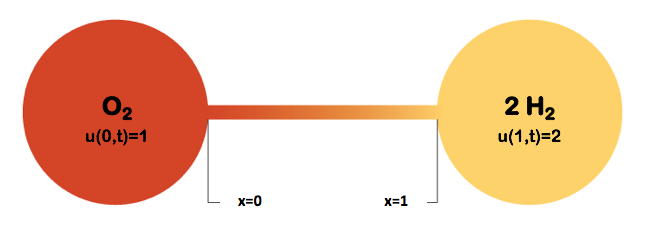

##Problema 1:



Resuelve numéricamente la ecuación de reacción-difusión para el caso de condiciones de frontera tipo Dirichlet por el método de BTCS, con condición inicial $u(x,0)=0$, y condiciones a la frontera $u(0,t)=1$ y $u(1,t)=2$, para un tiempo $t=0,..,1$.

Muestra una gráfica de la evolución temporal de la reacción difusión de los compuestos.

True


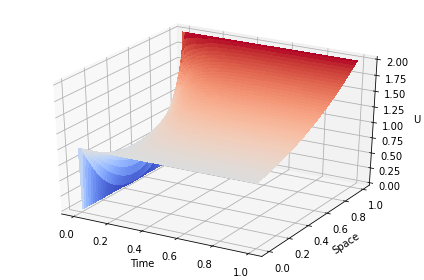

In [26]:
#Backward method to solve 1D reaction-diffusion equation:
#    u_t = D * u_xx + alpha * u
    
#with Dirichlet boundary conditions u(x0,t) = 0, u(xL,t) = 0
#and initial condition u(x,0) = 4*x - 4*x**2


M = 100 # GRID POINTS on space interval
N = 300 # GRID POINTS on time interval
#Aumente los puntos para ver si mejoraba , lo hizo levemente
x0 = 0
xL = 1

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

t0 = 0
tF = 1

# ----- Time step -----
dt = (tF - t0)/(N - 1)

D = 1 # Diffusion coefficient
alpha = -1 # Reaction rate

r = dt*D/dx**2
s = dt*alpha;

xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----
U[:,0] = 0.0

#----- Dirichlet boundary conditions -----
U[0,:] = 1.0 #condicion de u(0,t)=1
U[-1,:] = 2.0 #condicion en la frontera L=2

for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Right hand side
    U[1:M-1, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)
#____________________________
X1=X                       #-
T1=T                       #-
U1=U                       #-
#Para comparar en el 3

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.tight_layout()

plt.show()

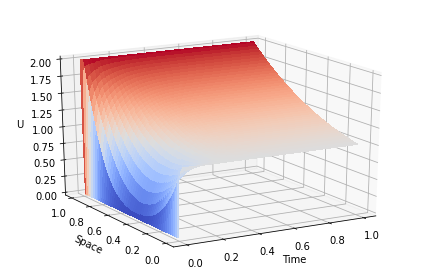

In [10]:
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.tight_layout()
ax.view_init(20, -120)
plt.show()

$U$ denota la concentracion del compuesto quimico.
Al inicio vemos que el tubo esta en el vacio ya que esta en 0, y luego inmediatamente despues hay una molecula en un extremo y dos en el otro extremo, vemos que el tubo se va llenando de forma rapida a una concentracion que se convierte en estable.

##Problema 2:



Ahora supondremos que se colocan reguladores de presión, que permiten flujo de los gases desde los reservorios hacia el tubo inicialmente vacío $u(x,0) = 0$. En $x=0$, el flujo de gas es $\partial u/\partial x (0,t) = 0.1$ y en $x=1$ el flujo $\partial u/\partial x (1,t) = 0.2$.

Se pide realizar una simulación numérica de este escenario para $=0,..,10$.

Condiciones de Neumann

True


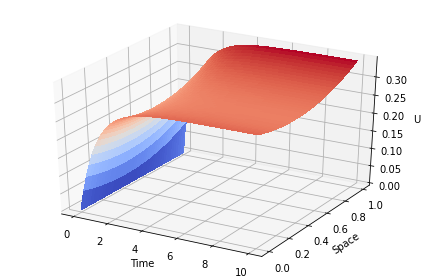

In [28]:
'''
Backward method to solve 1D reaction-diffusion equation:
    u_t = D * u_xx + alpha * u
    
with Neumann boundary conditions 
at x=0: u_x = sin(pi/2)
at x=L: u_x = sin(3*pi/4) with L=1
and initial condition u(x,0) = 4*x - 4*x**2
'''


M = 120 # GRID POINTS on space interval
N = 200 # GRID POINTS on time interval

x0 = 0
xL = 1

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

t0 = 0
tF = 10

# ----- Time step -----
dt = (tF - t0)/(N - 1)

D = 1  # Diffusion coefficient
alpha = -1 # Reaction rate

r = dt*D/dx**2
s = dt*alpha
a = 1 + 2*r - s


xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M))
off_diag = -r*np.ones((1, M-1))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()
A[0,1] = -2*r
A[M-1,M-2] = -2*r

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----
U[:,0] = 0.0 #inicialmente en el vacio

#----- Neumann boundary conditions -----
#leftBC = np.arange(1, N+1)
#print(leftBC)
f = 0.1*np.ones([N +1,1]) #en x=0 para cualquier tiempo vale 0.1

#rightBC = np.arange(1, N+1)
g = 0.2 *np.ones([N+1,1]) #en la frontera derecha en x=L=1 vale 0.2 para cualquier t


for k in range(1, N):
    c = np.zeros((M-2,1)).ravel()
    b1 = np.asarray([2*r*dx*f[k], 2*r*dx*g[k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[0:M, k-1])
    b = b1 + b2  # Right hand side
    U[0:M, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
gc = np.allclose(np.dot(A,U[0:M,N-1]), b)
print(gc)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)

#ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
#ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2])

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.tight_layout()
plt.show()

Aqui vemos que la concentracionaumenta y parece llegar a una estabilidad en 0. Empezamos con el tubo vacio y la concentracion sube de forma relativamente rapida pero no en magnitud.

##Problema 3:



¿Que pasaría en el caso de que se mezclaran dos gases que no reaccionan entre si, como sería mezclar dos recipientes con el mismo tipo de gas (el coeficiente de reacción $\alpha=0$)?.

Suponga que inicialmente el tubo está vacío $u(x,0)=0$ y la concentración en $u(0,t)=1$ y $u(1,t)=2$.

Resuelva numéricamente este caso.

Nos dan condiciones de Dirichlet

True


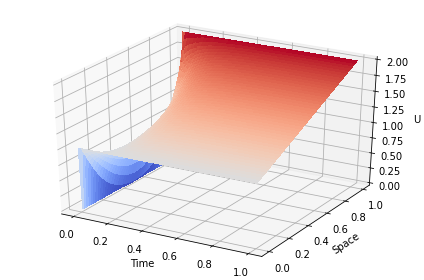

In [19]:
#Backward method to solve 1D reaction-diffusion equation:
#    u_t = D * u_xx + alpha * u
    
#with Dirichlet boundary conditions u(x0,t) = 0, u(xL,t) = 0
#and initial condition u(x,0) = 4*x - 4*x**2

#Discretizando el espacio
M = 100 # GRID POINTS on space interval  #Cantidad de puntos en el espacio
N = 300 # GRID POINTS on time interval #Puntos en el tiempo
#Aumente los puntos para ver si mejoraba , lo hizo levemente

x0 = 0
xL = 1
#El largo del tubo
# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)
#Paso en el espacio
t0 = 0
tF = 1
#Limite de tiempo
# ----- Time step -----
dt = (tF - t0)/(N - 1)
#Paso en el tiempo
D = 1 # Diffusion coefficient
alpha = 0 # Reaction rate
#Coeficientes de difusion y reaccion

r = dt*D/dx**2
s = dt*alpha;

#Creamos la malla
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

#Creamos la matriz tridiagonal en los proximos pasos
main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----
#Condicion inicial
U[:,0] = 0.0 #inicialmente vacio

#----- Dirichlet boundary conditions -----
U[0,:] = 1.0 #condicion de u(0,t)=1
U[-1,:] = 2.0 #condicion en la frontera L=2

for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Right hand side
    U[1:M-1, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)



ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.tight_layout()
plt.show()

Pareciera igual a al primer problema, ya que tenemos condiciones similares sin embargo el coeficiente de reaccion es mayor, por ende la concentracion de la sustancia es ligeramente mayor. Podemos hacer mas visible esto si experimentamos con el valor de $\alpha$ , siendo este el coeficiente de reaccion mientras mayor sea mayor concentracion encontrariamos de la sustancia y si es menor veriamos una curva hacia abajo. De esta forma vemos la naturaleza parabolica de la ecuacion. -1 y 0 son similares por eso la diferencia no es tan visible pero si volteamos las graficas para ver a donde tienden vemos que no tendrian la misma inclinacion.

Este ultimo problema podiamos haberlo resuelto con el codigo que ya teniamos para la ecuacion del calor.

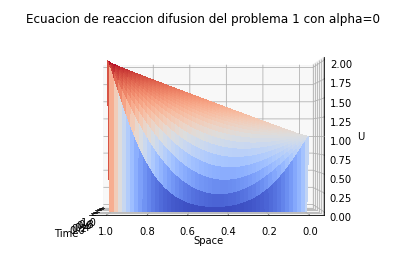

In [24]:
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)



ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.title('Ecuacion de reaccion difusion del problema 1 con alpha=0')
ax.view_init(0, -180)
plt.tight_layout()
plt.show()


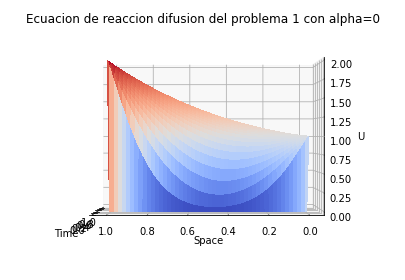

In [27]:
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X1, T1, U1, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.title('Ecuacion de reaccion difusion del problema 1 con alpha=0')
plt.tight_layout()
ax.view_init(0, -180)

plt.show()

Aqui vemos que como $\alpha$ es igual a -1 es ligeramente menor la concentracion de la sustancia.